In [7]:
import numpy as np
import matplotlib.pyplot as plt

from pylib.datapipeline import DataPipeline
from pylib import epilib as ep
from pylib import default
from pylib import hic

import os.path as osp

%load_ext autoreload
%autoreload 2
plt.rcParams['figure.figsize'] = [10,7]
plt.rcParams.update({'font.size':22})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
sim_pool = ep.Sim("ideal-chain-1024/pooling/")
sim_nopool = ep.Sim("ideal-chain-1024/no_pooling/")
sim_pool_nonconservative = ep.Sim("ideal-chain-1024/pooling_nonconservative")

ERROR:root:error loading sequences
ERROR:root:no ground truth hic found
ERROR:root:no path to obj_goal.txt
ERROR:root:looking in obj_goal_path: ideal-chain-1024/pooling/../../resources/obj_goal.txt
ERROR:root:no path to obj_goal_diag.txt
ERROR:root:looking in obj_goal_diag_path: ideal-chain-1024/pooling/../../resources/obj_goal.txt
ERROR:root:no maximum entropy goals found
ERROR:root:error loading sequences
ERROR:root:no ground truth hic found
ERROR:root:no path to obj_goal.txt
ERROR:root:looking in obj_goal_path: ideal-chain-1024/no_pooling/../../resources/obj_goal.txt
ERROR:root:no path to obj_goal_diag.txt
ERROR:root:looking in obj_goal_diag_path: ideal-chain-1024/no_pooling/../../resources/obj_goal.txt
ERROR:root:no maximum entropy goals found
ERROR:root:error loading sequences
ERROR:root:no ground truth hic found
ERROR:root:no path to obj_goal.txt
ERROR:root:looking in obj_goal_path: ideal-chain-1024/pooling_nonconservative/../../resources/obj_goal.txt
ERROR:root:no path to obj_go

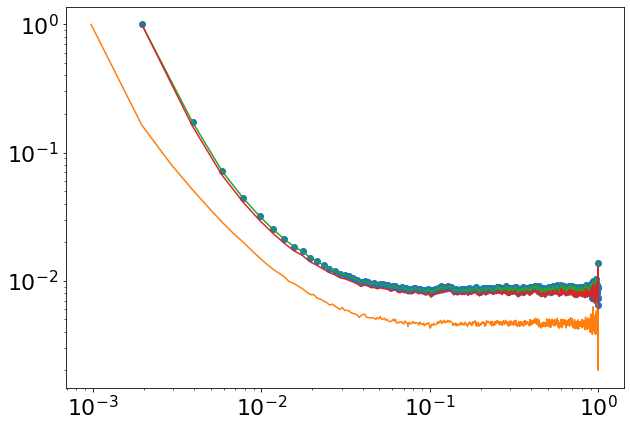

In [32]:
ep.plot_diagonal(sim_pool.hic, 'o', scale="loglog")
ep.plot_diagonal(sim_nopool.hic)
ep.plot_diagonal(hic.pool(sim_nopool.hic, 2))
ep.plot_diagonal(hic.pool_sum(sim_nopool.hic,2))

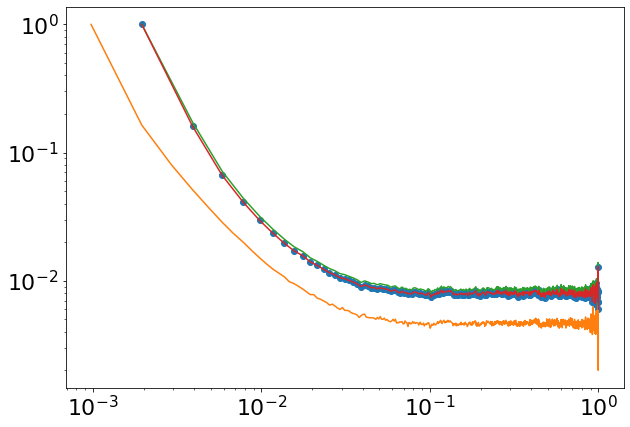

In [33]:
ep.plot_diagonal(sim_pool_nonconservative.hic, 'o', scale="loglog")
ep.plot_diagonal(sim_nopool.hic)
ep.plot_diagonal(hic.pool(sim_nopool.hic, 2))
ep.plot_diagonal(hic.pool_sum(sim_nopool.hic,2))

In [36]:
pooled_conservative = ep.get_diagonal(hic.pool(sim_nopool.hic, 2))
assert(np.allclose(sim_pool.d, pooled_conservative))

pooled_nonconservative = ep.get_diagonal(hic.pool_sum(sim_nopool.hic, 2))
assert(np.allclose(sim_pool_nonconservative.d, pooled_nonconservative))
